In [ ]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn import preprocessing
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Perceptron
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
import os
import cv2
from google.colab.patches import cv2_imshow
from sklearn import svm
from sklearn import metrics
import PIL
from PIL import Image
from numpy import asarray
plt.rcParams['figure.figsize'] = [8,5]
plt.rcParams['font.size'] =14
plt.rcParams['font.weight']= 'bold'
plt.style.use('seaborn-whitegrid')
import tensorflow as tf
import keras
from tensorflow.keras import datasets, layers, models
from keras import backend as K
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns 
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelBinarizer
from sklearn import metrics
from sklearn.metrics import accuracy_score
import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from sklearn.metrics import classification_report, confusion_matrix
from keras.models import Sequential
from keras.models import Sequential
from keras.layers import Conv2D, Input, ZeroPadding2D, BatchNormalization, Activation, MaxPooling2D, Flatten, Dense,Dropout
from keras.models import Model, load_model
from keras.callbacks import TensorBoard, ModelCheckpoint

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Data Reading and Processing 

First Reading The data from labels (Defected or not Defected)

In [ ]:
file_path = '/content/drive/MyDrive/CV Hackathon/Training Data/Labels/Train_DefectType_PrithviAI.csv'
df = pd.read_csv(file_path)
df_array=df.to_numpy()

In [ ]:
df_array.shape

(4051, 2)

In [ ]:
#Reading all images from testing dataset  from google drive
testing_dataset = []

for file in os.listdir(os.path.join("/content/drive/MyDrive/CV Hackathon/Testing Images")):
  x = os.path.join("/content/drive/MyDrive/CV Hackathon/Testing Images")
  path = os.path.join(x, file)
  img = cv2.imread(path)
  resized_image = cv2.resize(img, (512, 125)) 
  testing_dataset.append([file,resized_image])   
  print(len(testing_dataset))     

In [ ]:
testing_data_img_list = []
testing_data_filename = []


for i in testing_dataset:
  testing_data_filename.append(i[0])
  testing_data_img_list.append(i[1])


final_test_img_data = np.array(testing_data_img_list)
final_test_img_data = final_test_img_data/255


In [ ]:
len(testing_data_filename)

1099

In [ ]:
len(testing_data_img_list)

1099

In [ ]:
dataset_bad = [] 
for i in df_array :
  if i[1]== 1:


    for file in os.listdir(os.path.join("/content/drive/MyDrive/CV Hackathon/Training Data/Images Unzipped/Images")):
      if i[0]== file:
      
  
        x = os.path.join("/content/drive/MyDrive/CV Hackathon/Training Data/Images Unzipped/Images")

        path = os.path.join(x, file)
        img = cv2.imread(path)
        resized_image = cv2.resize(img, (512,125)) 
        dataset_bad.append([file,resized_image])   
        print(len(dataset_bad))

In [ ]:
count_bad=len(dataset_bad)

In [ ]:
count_bad

612

In [ ]:
dataset_good = []
counter=0
for i in df_array :
  while counter< count_bad+200:

    if i[1]== 0:


      for file in os.listdir(os.path.join("/content/drive/MyDrive/CV Hackathon/Training Data/Images Unzipped/Images")):
        if i[0]== file:
        
    
          x = os.path.join("/content/drive/MyDrive/CV Hackathon/Training Data/Images Unzipped/Images")

          path = os.path.join(x, file)
          img = cv2.imread(path)
          resized_image = cv2.resize(img, (512,125)) 
          dataset_good.append([file,resized_image])   
          print(len(dataset_good))
    counter=counter+1
  
       

In [ ]:
counter=0

good_data=[]
for i in dataset_good:
  
  
  while counter < int(count_bad) :
      good_data.append([i[1],0])
      counter=counter+1
    

In [ ]:
len(good_data)

612

In [ ]:
test_good_data=[]
for i in dataset_good[613:]:
  test_good_data.append([i[1],0])

In [ ]:
good_data[0]

In [ ]:
bad_data=[]
for i in dataset_bad:
  bad_data.append([i[1],1])

In [ ]:
bad_data[0]

In [ ]:
good_data[0]

In [ ]:
final_dataset=good_data+bad_data

In [ ]:
import random
random.shuffle(final_dataset)

In [ ]:
image_data=[]
label=[]
for i  in final_dataset:
  image_data.append(i[0])
  label.append(i[1])


In [ ]:
imagedata = np.array(image_data)
imagedata= imagedata/255

In [ ]:
imagedata[0]

In [ ]:
imagedata.shape

(1224, 125, 512, 3)

In [ ]:
label[0]

1

In [ ]:
label_array=np.array(label)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(imagedata,label_array, test_size = 0.20)

In [ ]:
x_test.shape

(245, 125, 512, 3)

In [ ]:
for i in x_test:
  print(i)
  break

In [ ]:
 counter = 0

i = x_test[0]
# if (i in x_train):
#   print(i)
#   print(x_train)
# print(counter)
# Get the index of elements with value 15
result = np.where(x_train == i)
print('Tuple of arrays returned : ', result)
print("Elements with value 15 exists at following indices", result[0], sep='\n')

#***CNN Implementation for Defect Detection in Fabric***

In [ ]:
#Our CNN takes tensors of shape (image_height, image_width, color_channels)
#Intializing the architecture for CNN model having ReLU as activation function and using MaxPooling
cnn_classifier = models.Sequential()
cnn_classifier.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(512, 125, 3)))
cnn_classifier.add(layers.MaxPooling2D((2, 2)))
cnn_classifier.add(layers.Conv2D(64, (3, 3), activation='relu'))
cnn_classifier.add(layers.MaxPooling2D((2, 2)))
cnn_classifier.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [ ]:
# The architecture of our CNN classifier uptil now.
cnn_classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 510, 123, 32)      896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 255, 61, 32)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 253, 59, 64)       18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 126, 29, 64)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 124, 27, 64)       36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Adding Dense Layers on Top to perform Classification on mask detection because Dense layers take vectors as input (which are 1D), while the current output is a 3D tensor.
cnn_classifier.add(layers.Flatten())
cnn_classifier.add(layers.Dense(64, activation='relu'))
cnn_classifier.add(layers.Dense(10))
cnn_classifier.add(layers.Dense(5))
cnn_classifier.add(layers.Dense(2))

Here's the complete architecture of our model.

In [ ]:
# The architecture of our finalised CNN classifier.
cnn_classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 510, 123, 32)      896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 255, 61, 32)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 253, 59, 64)       18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 126, 29, 64)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 124, 27, 64)       36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 214272)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)               

In [ ]:
# Compiling and training our CNN classifier using keras API based on accuracy and epoch = 12
cnn_classifier.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
history = cnn_classifier.fit(x_train , y_train, epochs = 3,  validation_data=(x_test , y_test))

Epoch 1/3
31/31 [==============================] - 108s 3s/step - loss: 1.0843 - accuracy: 0.8999 - val_loss: 0.0386 - val_accuracy: 0.9959
Epoch 2/3
31/31 [==============================] - 106s 3s/step - loss: 0.0321 - accuracy: 0.9908 - val_loss: 0.0078 - val_accuracy: 0.9959
Epoch 3/3
31/31 [==============================] - 106s 3s/step - loss: 0.0587 - accuracy: 0.9877 - val_loss: 0.0363 - val_accuracy: 0.9878


### Evaluate the model

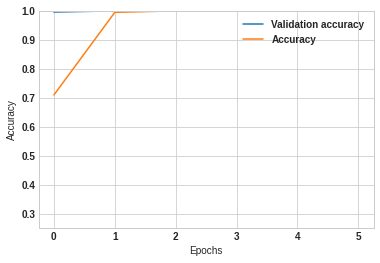

In [ ]:
#Plotting accuracy and validation accuracy vs epoch to see if we are overfitting or underfitting
plt.plot(history.history['val_accuracy'], label = 'Validation accuracy')
plt.plot(history.history['accuracy'], label='Accuracy')
plt.ylim([0.25, 1])
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(loc = 'upper right')
test_loss_occured, test_accuracy = cnn_classifier.evaluate(x_test, y_test, verbose = 10)

In [ ]:
#Various parameters calculated during training
history.history

{'accuracy': [0.7099080681800842, 0.9948927760124207, 1.0, 1.0, 1.0, 1.0],
 'loss': [0.6732575297355652,
  0.017292993143200874,
  0.001147932605817914,
  3.1309427868109196e-05,
  2.2784481188864447e-05,
  1.8342709154239856e-05],
 'val_accuracy': [0.9959183931350708, 1.0, 1.0, 1.0, 1.0, 1.0],
 'val_loss': [0.03735005110502243,
  0.012103268876671791,
  4.259477282175794e-05,
  2.8363510864437558e-05,
  2.269916694785934e-05,
  1.989411066460889e-05]}

# Another CNN

In [ ]:
listlabels=['good','bad']

In [ ]:
test_good_images=[]
test_good_labels=[]
for i in test_good_data:
  test_good_images.append(i[0])
  test_good_labels.append(i[1])


In [ ]:
test_good_ary=np.array(test_good_images)
test_good_ary=test_good_ary/255

In [ ]:
y_predict_good = cnn_classifier.predict(test_good_ary)
predicted_class_good = [np.argmax(element) for element in y_predict_good]

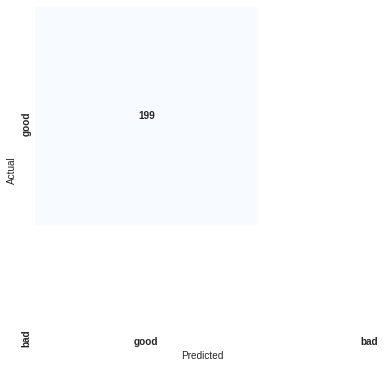

In [ ]:
cm = confusion_matrix(test_good_labels,predicted_class_good)
plt.figure(figsize=(6,6))
sns.heatmap(cm, cbar=False, xticklabels=listlabels, yticklabels=listlabels, fmt='d', annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
y_predict_final = cnn_classifier.predict(final_test_img_data)
final_predicted_class = [np.argmax(element) for element in y_predict_final]

In [ ]:
y_predict_final

array([[ 25.969082 ,  39.8464   ,  -7.729013 , ..., -31.489552 ,
        -19.850103 , -51.45193  ],
       [ 24.639465 ,  37.474697 ,  -7.3375607, ..., -29.81519  ,
        -18.684107 , -48.440434 ],
       [ 26.120731 ,  39.679043 ,  -7.728513 , ..., -31.549229 ,
        -19.795332 , -51.35099  ],
       ...,
       [ 24.846807 ,  37.628292 ,  -7.396506 , ..., -30.006725 ,
        -18.718334 , -48.71898  ],
       [ 24.59519  ,  38.39251  ,  -7.3833065, ..., -30.046812 ,
        -19.297504 , -49.236923 ],
       [ 26.319113 ,  39.726532 ,  -7.7837524, ..., -31.741032 ,
        -19.783417 , -51.529114 ]], dtype=float32)

In [ ]:
final_predicted_class.count(1)

1099

In [ ]:
prediction = pd.DataFrame(y_pred, columns=['class']).to_csv('prediction_finale.csv')
